In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Assign colum names to the dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read dataset to pandas dataframe
dataset = pd.read_csv(url, names=names)

In [3]:
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values


In [8]:
#separo el conjunto de entrenamiento y de test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [10]:
#reescalo
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
#defino el algoritmo
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
#entreno el modelo
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [12]:
#hago una prediccion
y_pred = classifier.predict(X_test)

In [13]:
#una que era vig fue puesta como versi
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 7  0  0]
 [ 0 13  0]
 [ 0  2  8]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.87      1.00      0.93        13
 Iris-virginica       1.00      0.80      0.89        10

       accuracy                           0.93        30
      macro avg       0.96      0.93      0.94        30
   weighted avg       0.94      0.93      0.93        30



In [18]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    #defino numero de vecinos
    knn = KNeighborsClassifier(n_neighbors=i)
    #entreno
    knn.fit(X_train, y_train)
    #hago prediccion
    pred_i = knn.predict(X_test)
    #calcula media de los que no coinciden
    error.append(np.mean(pred_i != y_test))
   

Text(0, 0.5, 'Mean Error')

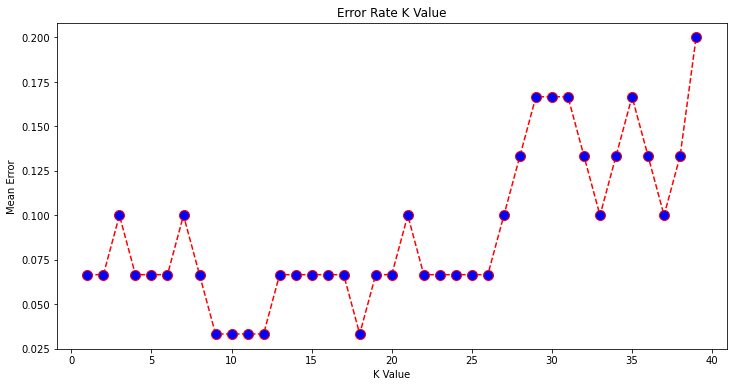

In [19]:
#diaagrama
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color="red", linestyle="dashed", marker="o",
         markerfacecolor="blue", markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')